**Ce notebook est une copie de Prosper_clust_ML**

Les réglages des ngram et min max df sont différents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import spacy

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser, MergeDFAndComputeFeature
from featuring.machinelearning import MachineLearning

In [2]:
# import sys
# !{sys.executable} -m pip install -U spacy_langdetect
# !{sys.executable} -m spacy download en_core_web_md
# !{sys.executable} -m spacy download fr_core_news_md

#  Charger les data set

In [3]:
#%% load df
dfjson=pd.read_json("data\\bing_results.json")
df=pd.read_csv("data\\prop_wiki.csv")

# Class MergeDFAndComputeFeature

### Instancier la classe avec les 2 tableaux de données ‘snippet’ et ‘wiki’
*Method: .instantiate_df()*
### Nettoyer les adresses
*Method: .clean_address()*
### Calculer les features (ndot, nwords, bothnumsandwords)
*Method: .mergedf()*


In [4]:
#%% merge and compute features
mdf2=MergeDFAndComputeFeature(df1=dfjson, df2=df)
print(mdf2)

# load df1 & df2 within class
mdf2.instantiate_df()

# remove www. before computing features
mdf2.clean_adress()

# merge df & compute feature
mdf2.mergedf()

------------------------------------

shape is nrow:12975 and ncol:4 

      count_occur                               origin_query  \
0               2                extrudeuse machine learning   
1               2                extrudeuse machine learning   
10              1                extrudeuse machine learning   
100             2                extrudeuse machine learning   
1000            1  test inspection product testing recording   

                                                snippet  \
0     Advanced Manufacturing Agritech Aviation Maint...   
1     ANT Smart Factory is a user-friendly system, w...   
10    Technical Learning. How to wire an RTD and get...   
100   Understanding Swiss-Type Machining. Once seen ...   
1000  This test results in an enumeration of the tot...   

                         url  
0                amatrol.com  
1            antsolutions.eu  
10              in.omega.com  
100        www.mmsonline.com  
1000  www.foodtestinglab.com   

t

C:\Users\xavier\Documents\Prosper\featuring\functions.py:51: UserWarning: extension is not available for IP
  warnings.warn('extension is not available for IP')


### Pre processer les snippet pour le NLP
*Method: .nlp_preprocess(self, stop_fr=None, stop_en=None)*

Retire les ///, mets en minuscule, determine la langue, retire les stopwords, lemmatize

Possibilité d’ajouter des stop_words définis par l’utilisateur


In [5]:
#%% preprocess for NLP
mdf2.nlp_preprocess(stop_fr=None, stop_en=None)

raw french stopwords list loaded
raw english stopwords list loaded
--- waiting 3 seconds ---
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
la

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fa
identified language is neither english nor french
language is fa
identified language is neither english nor french
language is fr
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language i

language is UNKNOWN
identified language is neither english nor french
language is fr
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
langu

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
langu

language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is zh-tw
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified langua

language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is fr
language is en
language is ar
identified language is neither english nor french
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is da
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


### Effectuer le NLP
*Method: .nlp_process(self,lang='fr',**kwargs)*

Choix d’une langue

Possibilité d’ajuster les ngram et les min max df

Calcule les tfidf



In [6]:
#%% process for NLP
mdf2.nlp_process(lang='fr', min_df=10, max_df=3000, ngram_range=(2,3))

ngram_range is set to: (2, 3)
max_df is set to: 3000
min_df is set to: 10
chosen language is French
tfidf computed, see tfidf & tfidf_features attributes


Réglages actuels:
- Ngram (2,3)
- min_df (10)
- max_df (3000)

#### Questions:

Quels sont les *meilleurs* hyperparamètres (ngram, min/max df) ?

### Preparer les data set
*Method: .preparedataset(self, add_user_feature=True)*

Définies le tableau de features dfX et celui de la variable cible dfy (‘wiki’)

Possbilité d’ajouter les features définies par l’utilisateur ‘ndot’ et ‘bothnumsandswords’


In [7]:
#%% prepare data set
mdf2.preparedataset(add_user_feature=False)



data set prepared with only: 
 -tfidf features

Shape is: 
 -nrow: 8114 
 -ncol: 832

 ------ data set ready ------



# Class MachineLearning

### Instancier la class avec les dataframe dfX et dfy
### Créer les jeux de données train & test
*Method: .split_data()*
### Possibilité de faire une PCA:
*Method: .do_pca()*

Si data set déjà divisé en train/ test .fit_transform(train) →  .transform(test) sinon .fit_transform(dfX)


In [8]:
#%% ML
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

# ml.do_pca() #optional


data were splitted with parameters: 
 -test_size: 0.5


### Instancier le classifier
*Method: .instantiate_classif()*

Choix entre random forest, logistic regression, naive bayes

Principaux hyperparamètres accessibles

### Entrainer le classifier et afficher le score et matrice de confusion
*Method: .fit_classif()*


**Classification : peut on prédire quels websites ont une page wikipedia ?**

In [9]:
ml.instantiate_classif(classifier='lr',
                       max_depth=15,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=3,
                       solver=None
                       )
ml.fit_classif()


 Classifier is logistic regression 

 hyperparameters are: 
 -C: 3
 -penalty: none
 -solver: lbfgs


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



 Score is 0.888
Confusion matrix is 
 [[3554  203]
 [ 253   47]]


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Bilan

- Mauvais score

Il est difficile de prédire quels website ont une page wikipedia

### Clustering
*Method: .do_dbscan()*

Pour le dbscan existe une methode *.find_dbscan()* qui recherche parmi plusieurs metriques et plusieurs eps la proportion d’individus (de lignes) assignée au groupe Erreur ou à un seul cluster

Principaux paramètres accessibles

*Method: .do_kmeans()*

Pour le kmeans existe une methode *.find_kmeans()* qui affiche le résultat de la méthode de Pham pour déterminer le nombre idéal de cluster

Voir ici pour le détail: [github Pham]( https://github.com/Vonatzki/pham_dimov_python/blob/master/Pham-Dimov%20Python%20Implementation.ipynb)


-----------------------------------------------
metrics tested will be: 
 ['jaccard', 'sqeuclidean', 'chebyshev']
-----------------------------------------------
eps tested will be: 
 [0.01, 0.1, 1, 10]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: sqeuclidean and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebyshev and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebysh

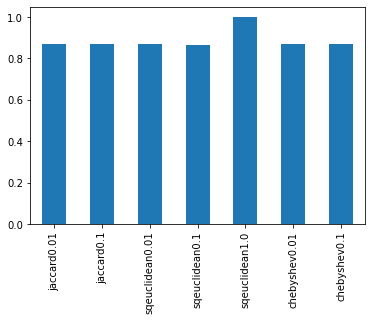

Number of dimensions detected: 832

CENTROID 1 || sk: 5735.164184237235	fk: 1.0	a: None
CENTROID 2 || sk: 5687.694305936396	fk: 0.9926178008719946	a: 0.9990985576923077
CENTROID 3 || sk: 5671.878342780284	fk: 0.9979689425020887	a: 0.9992487980769231
CENTROID 4 || sk: 5634.216171771927	fk: 0.993982075904246	a: 0.9993739983974359
CENTROID 5 || sk: 5608.582389838093	fk: 0.995969903147271	a: 0.9994783319978633
CENTROID 6 || sk: 5595.721153405699	fk: 0.9981407801148989	a: 0.999565276664886
CENTROID 7 || sk: 5584.106284255621	fk: 0.9982859787543772	a: 0.9996377305540717
CENTROID 8 || sk: 5536.3717087588475	fk: 0.9917511081455208	a: 0.9996981087950597
CENTROID 9 || sk: 5528.234845578372	fk: 0.9987815590552168	a: 0.9997484239958832
CENTROID 10 || sk: 5490.593816366091	fk: 0.9933993934502748	a: 0.9997903533299026


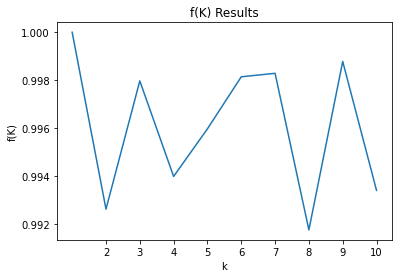


 ------ dbscan clustering done ------

{-1: 2683, 0: 4880, 1: 15, 2: 8, 3: 6, 4: 18, 5: 7, 6: 7, 7: 9, 8: 7, 9: 8, 10: 7, 11: 7, 12: 8, 13: 7, 14: 16, 15: 9, 16: 8, 17: 5, 18: 7, 19: 5, 20: 5, 21: 6, 22: 5, 23: 7, 24: 7, 25: 6, 26: 10, 27: 8, 28: 6, 29: 9, 30: 5, 31: 7, 32: 10, 33: 7, 34: 7, 35: 5, 36: 6, 37: 6, 38: 6, 39: 5, 40: 6, 41: 5, 42: 6, 43: 5, 44: 11, 45: 14, 46: 5, 47: 10, 48: 8, 49: 6, 50: 5, 51: 5, 52: 9, 53: 5, 54: 5, 55: 6, 56: 10, 57: 7, 58: 5, 59: 6, 60: 6, 61: 18, 62: 5, 63: 5, 64: 5, 65: 6, 66: 7, 67: 6, 68: 7, 69: 5, 70: 5, 71: 11, 72: 6, 73: 5, 74: 5, 75: 6, 76: 7}

------row: dbscan, col: wiki------
col_0   0.0  1.0
row_0           
-1     2460  223
 0     4519  361
 1       15    0
 2        8    0
 3        6    0
 4       17    1
 5        7    0
 6        4    3
 7        8    1
 8        7    0
 9        8    0
 10       5    2
 11       7    0
 12       7    1
 13       7    0
 14      16    0
 15       8    1
 16       8    0
 17       5    0
 18       6  

In [10]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

if True:
    ml.find_dbscan(metrics=['jaccard','sqeuclidean', 'chebyshev'], eps=[0.01,0.1,1,10], min_samples=4)

if True:
    ml.find_kmeans(max_k = 10)


ml.do_kmeans(nK=2)

ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
unique, counts = np.unique(ml.dfy_db, return_counts=True)
print(dict(zip(unique, counts)))

print('\n------row: dbscan, col: wiki------')
print(pd.crosstab(ml.dfy_db, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: kmeans, col: wiki------')
print(pd.crosstab(ml.dfy_kmeans, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: dbscan, col: kmeans------')
print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
cluster_dbscan=pd.DataFrame(ml.dfy_db)

print('\n N of website in each cluster (KMEANS)\n')
print(cluster_kmeans[0].value_counts())

In [11]:
# just for reload clustering

# ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)
# ml.do_kmeans(nK=2)
# cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)

#### Bilan:
- dbscan ne fonctionne pas, quelle que soit la métrique utilisée
- léger avantage pour k=2 avec le kmeans
- pas de lien a priori entre la variable wiki et les 2 clusters identifiés par Kmeans


# Machine learning & Clustering

###  Logistic Regression

In [12]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 1.000
Confusion matrix is 
 [[3995    0]
 [   0   62]]

pca done?  False


#### Bilan:
- bon score du classifier sur le testing set sur les clusters identifiés par kmeans

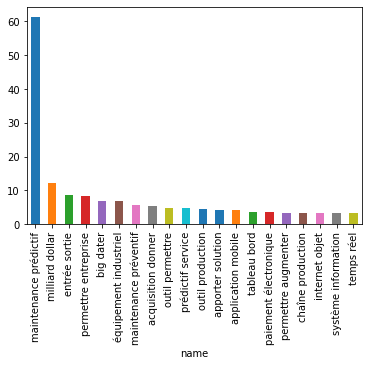

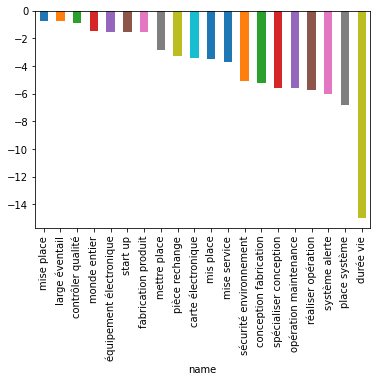

In [13]:
#%%
coef_lr=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.coef_[0].ravel())})

# print(coef_lr.sort_values('coef', ascending = False)[0:20])
# print(coef_lr.sort_values('coef', ascending = False)[-20::])

coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].plot.bar()
plt.show()

#### Bilan

il semble qu'il y ait:
- un cluster associé au secteur tertiaire
- un cluster associé au secteur industriel


### Random Forest

In [14]:
#%% ML with kmeans clusters 

ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='rf',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=1000,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is random forest 

 hyperparameters are: 
 -n_estimators: 1000
 -max_depth: 4
 -class_weight: balanced_subsample

 Score is 1.000
Confusion matrix is 
 [[3995    0]
 [   1   61]]

pca done?  False


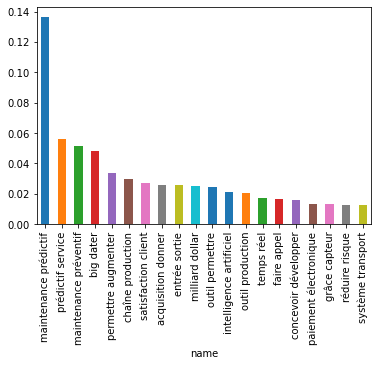

In [15]:
coef_rf=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.feature_importances_.ravel())})

# print(coef_rf.sort_values('coef', ascending = False)[0:20])

coef_rf.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()

# Analyses complémentaires

In [16]:
ax_X=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=1)
ax_Y=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=1)

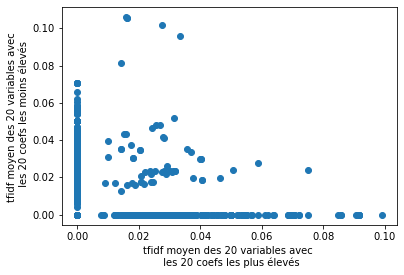

In [17]:
plt.scatter(ax_X,ax_Y)
plt.xlabel('tfidf moyen des 20 variables avec \n les 20 coefs les plus élevés')
plt.ylabel('tfidf moyen des 20 variables avec \n les 20 coefs les moins élevés')
plt.show()

In [18]:
mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0)

maintenance prédictif    0.008986
milliard dollar          0.000927
entrée sortie            0.000896
permettre entreprise     0.000749
big dater                0.003432
équipement industriel    0.001251
maintenance préventif    0.002420
acquisition donner       0.001036
outil permettre          0.000959
prédictif service        0.000557
outil production         0.000685
apporter solution        0.001298
application mobile       0.001586
tableau bord             0.001139
paiement électronique    0.000757
permettre augmenter      0.001242
chaîne production        0.001291
internet objet           0.000870
système information      0.002882
temps réel               0.004980
dtype: float64

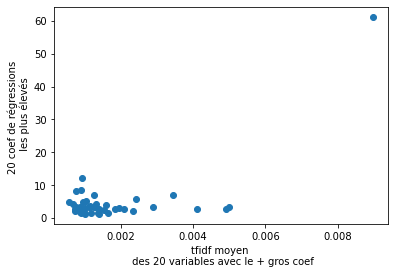

In [19]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40])
plt.xlabel('tfidf moyen \n des 20 variables avec le + gros coef')
plt.ylabel('20 coef de régressions \n les plus élevés')
plt.show()

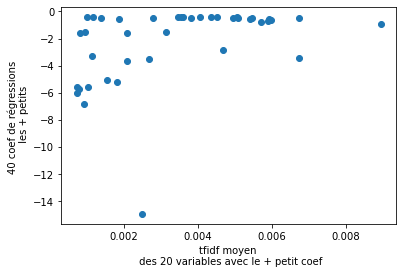

In [20]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::])
plt.xlabel('tfidf moyen \n des 20 variables avec le + petit coef')
plt.ylabel('40 coef de régressions \n les + petits')
plt.show()

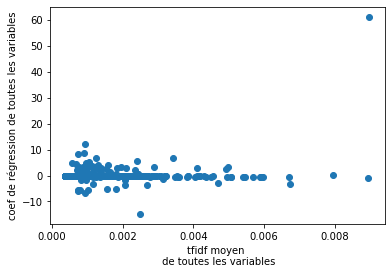

In [21]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef)
plt.ylabel('coef de régression de toutes les variables')
plt.xlabel('tfidf moyen \n de toutes les variables')
plt.show()

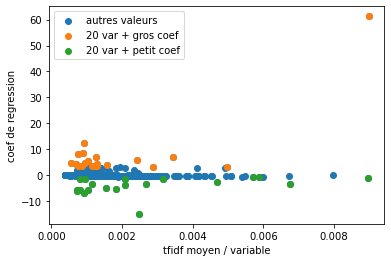

In [22]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef, label='autres valeurs')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], label='20 var + gros coef')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::], label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

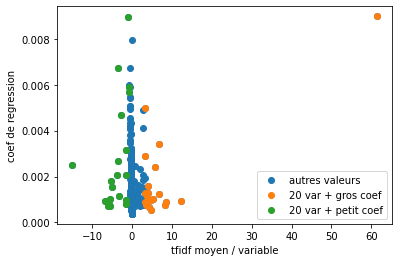

In [23]:
plt.scatter(coef_lr.coef,mdf2.dfX.mean(axis=0), label='autres valeurs')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], 
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
            label='20 var + gros coef')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::],
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
            label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

In [24]:
mot_cluster = pd.concat([pd.Series(mdf2.df_merged[mdf2.df_merged['language']=='fr'].url).reset_index(drop=True), cluster_kmeans.reset_index(drop=True)],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [25]:
mot_cluster.head()

,mot,cluster
0,www.ratp.fr,0
1,www.ratp.fr,0
2,www.ratp.fr,0
3,www.ratp.fr,0
4,www.ratp.fr,0


In [26]:
mot_cluster.shape

(8114, 2)

In [27]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot                                        
0        194.214.100.224:8090                           1
         1951.polytechnique.org                         1
         224business.net                                1
         360learning.com                                1
         3dmodularsystems.com                           2
         3m.loreval.fr                                  1
         52.force-ouvriere.org                          1
         53.force-ouvriere.org                          1
         94.citoyens.com                                1
         99designs.fr                                   1
         a06.apps.paris.fr                              1
         a190754.free.fr                                1
         aa-boschap-fr.resource.bosch.com               1
         aaa.public.lu                                  1
         aalberts-website.s3.eu-west-1.amazonaws.com    1
         abovas.com                                     1
         abylsen.co

In [28]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
0,www.ratp.fr,0
5416,www.banquepopulaire.fr,0
5412,www.av-test.org,0
5411,www.autosecurite.com,0
5409,www.assaabloyopeningsolutions.fr,0
5408,www.ass-security.fr,0
5407,www.arubanetworks.com,0
5406,www.arengi.fr,0
5405,www.apeaksoft.com,0
5404,www.ammyy.com,0


In [29]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 0]

['www.ratp.fr',
 'www.remorquerolland.com',
 'www.renault.fr',
 'www.safran-group.com',
 'www.scoop.developpement-durable.gouv.fr',
 'www.scopex.fr',
 'www.se.com',
 'www.seat.fr',
 'www.senat.fr',
 'www.senseofwellness-mag.com',
 'www.service-public.fr',
 'www.setam.com',
 'www.sieeen.orios-infos.com',
 'www.skoda.fr',
 'www.smart.com',
 'www.societegenerale.com',
 'www.sojadis.com',
 'www.steyr-traktoren.com',
 'www.stone-wash.fr',
 'www.sydec40.fr',
 'www.tam-surplus.fr',
 'www.tcp-quad.com',
 'www.techno-science.net',
 'www.telip.fr',
 'www.tesla.com',
 'www.thebusinessplanshop.com',
 'www.thema-radiologie.fr',
 'www.tilt-equipement.com',
 'www.toro-distribution.com',
 'www.toro.com',
 'www.total.fr',
 'www.toyota.fr',
 'www.trakto.ca',
 'www.transportissimo.com',
 'www.tresor.economie.gouv.fr',
 'www.truck.man.eu',
 'www.truckchocdiscount.com',
 'www.ugap.fr',
 'www.gov.mb.ca',
 'www.universfreebox.com',
 'www.unoosa.org',
 'www.us-militaria.com',
 'www.usine-digitale.fr',
 'www.u

In [30]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 1]

['www.skf.com',
 'lindustrie40.fr',
 'p.21-bal.com',
 'slidegur.com',
 'www.analysepredictive.fr',
 'www.logismarket.fr',
 'www.praxedo.com',
 'www.progress-m.com',
 'www.tribofilm.fr',
 'www.zdnet.fr',
 'www.sicara.fr',
 'cybercriminalite.blog',
 'diagdataia.bpifrance.fr',
 'domoserv.com',
 'elec.jbd.free.fr',
 'electronique-news.com',
 'euedocs.emersonprocess.co.uk',
 'flexthings.fr',
 'forcesoperations.com',
 'invenis.co',
 'lappfrance.lappgroup.com',
 'openindus.com',
 'tpmattitude.fr',
 'www.andromediatech.com',
 'www.arrow.com',
 'www.capgemini.com',
 'www.coopets.ca',
 'www.directindustry.fr',
 'www.domoserv.com',
 'www.feuvert-entreprises.fr',
 'www.fsvg.fr',
 'www.ingexpert.com',
 'www.isilf.be',
 'www.labsolux.com',
 'www.mobility-work.com',
 'www.scoop.it',
 'www.siema.fr',
 'www.thesneaklife.com',
 'www.volkswagen-group-fleet-solutions.fr',
 'citedelobjetconnecte.com',
 'maintenance.fivesgroup.com',
 'rtone.fr',
 'siecledigital.fr',
 'vipress.net',
 'www.ifp-school.com',
 '

Cluster 1: beaucoup d'assurances là dedans

# Classif & Clustering avec le data frame transposé

**Objectif**: regrouper les mots associés

**Bilan:** 

In [51]:
col_name=mdf2.df_merged[mdf2.df_merged['language']=='fr'].url

In [52]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=pd.DataFrame({'fake':range(0,mdf2.dfX.shape[1])}))
ml.do_pca(n_components=2)


dataset was NOT splitted, applying pca on dfX


In [53]:
ml.dfX

array([[-0.02309146, -0.02136006],
       [-0.02309146, -0.02136006],
       [-0.02895335, -0.02849283],
       ...,
       [ 0.01249534, -0.02159765],
       [-0.0268683 , -0.02470744],
       [-0.01855319, -0.02152599]])


-----------------------------------------------
metrics tested will be: 
 ['euclidean']
-----------------------------------------------
eps tested will be: 
 [0.05, 0.5, 5]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------



    eps     metric  Percentage_Err_Grp1
0  0.05  euclidean                  1.0
0  0.50  euclidean                  1.0
0  5.00  euclidean                  1.0

--------------------------------------------------

Percentage_Err_Grp1 represents the proportion of rows assignated either to Error group or to only One cluster by dbscan 
High ratio indicates non consistent clustering



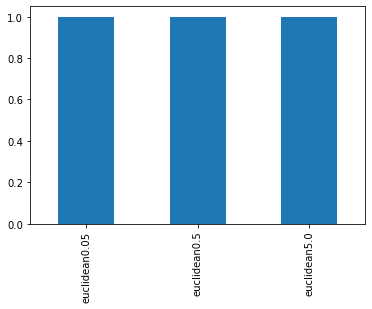

Number of dimensions detected: 2

CENTROID 1 || sk: 109.13403050784235	fk: 1.0	a: None
CENTROID 2 || sk: 55.61085121193005	fk: 0.8153035448708564	a: 0.625
CENTROID 3 || sk: 11.174789618047688	fk: 0.29228539197303316	a: 0.6875
CENTROID 4 || sk: 3.902463027617882	fk: 0.4721851513841015	a: 0.7395833333333334
CENTROID 5 || sk: 2.390707255501164	fk: 0.782408471159349	a: 0.7829861111111112
CENTROID 6 || sk: 1.4840701503779683	fk: 0.757812727366269	a: 0.8191550925925927
CENTROID 7 || sk: 0.9276633602229154	fk: 0.7359985194998768	a: 0.8492959104938272
CENTROID 8 || sk: 0.6905773579865343	fk: 0.851344230355955	a: 0.8744132587448561
CENTROID 9 || sk: 0.5435231614777569	fk: 0.8790541076209124	a: 0.8953443822873801
CENTROID 10 || sk: 0.46170235826819533	fk: 0.9306247490746862	a: 0.9127869852394834
CENTROID 11 || sk: 0.39543381185423115	fk: 0.9235936041540753	a: 0.9273224876995695
CENTROID 12 || sk: 0.3325195857211803	fk: 0.8951101983051424	a: 0.939435406416308
CENTROID 13 || sk: 0.2890127072008551

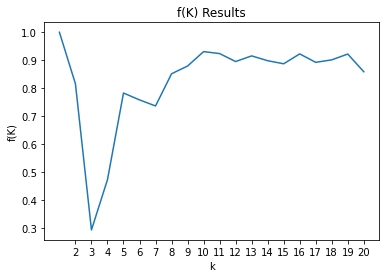

In [54]:
if True:
    ml.find_dbscan(metrics=['euclidean'], eps=[0.05, 0.5, 5], min_samples=5)

if True:
    ml.find_kmeans(max_k = 20)



In [55]:
ml.do_kmeans(nK=3)

# ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
# unique, counts = np.unique(ml.dfy_db, return_counts=True)
# print(dict(zip(unique, counts)))


# print('\n------row: dbscan, col: kmeans------')
# print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
# print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
# cluster_dbscan=pd.DataFrame(ml.dfy_db)

In [56]:
pd.Series(cluster_kmeans[0]).value_counts()

0    830
2      1
1      1
Name: 0, dtype: int64

In [57]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=cluster_kmeans)
ml.do_pca(n_components=2)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


dataset was NOT splitted, applying pca on dfX

data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 0.998
Confusion matrix is 
 [[415   0]
 [  1   0]]

pca done?  True


In [58]:
pd.DataFrame(ml.dfX).head()

,0,1
0,-0.022852,-0.021216
1,-0.022852,-0.021216
2,-0.030074,-0.029184
3,-0.022898,-0.021695
4,-0.025808,-0.023270


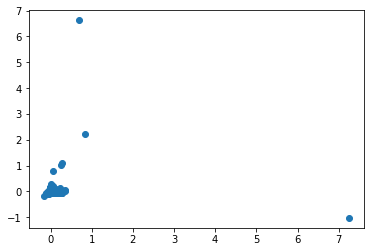

In [59]:
plt.scatter(pd.DataFrame(ml.dfX)[0],pd.DataFrame(ml.dfX)[1])

In [60]:
mot_cluster = pd.concat([pd.Series(mdf2.dfX.T.index), cluster_kmeans],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [61]:
mot_cluster.shape

(832, 2)

In [62]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot                        
0        accepter utilisation           1
         accepter utilisation cookie    1
         accident travail               1
         accident travail maladie       1
         accident vie                   1
         accompagner entreprise         1
         accès soin                     1
         accéder service                1
         achat véhicule                 1
         acquisition donner             1
         acteur majeur                  1
         action prévention              1
         action social                  1
         activité lier                  1
         activité professionnel         1
         adapter besoin                 1
         agence nationale               1
         agent sécurité                 1
         agirc arrco                    1
         aide social                    1
         alimentation électrique        1
         aléa vie                       1
         amélioration continuer        

In [63]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
0,accepter utilisation,0
548,proposer service,0
549,proposer solution,0
550,protection donner,0
551,protection environnement,0
552,protection incendie,0
553,protection individuel,0
554,protection social,0
555,protéger famille,0
556,protéger santé,0


In [64]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 0]

['accepter utilisation',
 'accepter utilisation cookie',
 'accident travail',
 'accident travail maladie',
 'accident vie',
 'accompagner entreprise',
 'accès soin',
 'accéder service',
 'achat véhicule',
 'acquisition donner',
 'acteur majeur',
 'action prévention',
 'action social',
 'activité lier',
 'activité professionnel',
 'adapter besoin',
 'agence nationale',
 'agent sécurité',
 'agirc arrco',
 'aide social',
 'alimentation électrique',
 'aléa vie',
 'amélioration continuer',
 'amélioration performance',
 'amélioration qualité',
 'améliorer qualité',
 'améliorer sécurité',
 'aménagement véhicule',
 'an expérience',
 'analyse donner',
 'annoncer lancement',
 'appel offre',
 'application loi',
 'application mobile',
 'apporter solution',
 'apprentissage automatique',
 'apprentissage machine',
 'arrêt travail',
 'article code',
 'article loi',
 'artificiel ia',
 'assurance auto',
 'assurance emprunteur',
 'assurance maladie',
 'assurance prévoyance',
 'assurance qualité',
 'assur

In [65]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 1]

['contrôler qualité']

In [66]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 2]

['maintenance prédictif']

In [67]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 3]

[]

In [68]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 4]

[]